In [3]:
import numpy as np
import matplotlib.pyplot as plt
lims = (-5,5)
lims

(-5, 5)

In [4]:
np.random.seed(1)
data2 = np.random.multivariate_normal([0,0], [[2,1.5],[1.5,2]], 1000)
data2 = data2.T
data2.shape

(2, 1000)

(-5.0, 5.0)

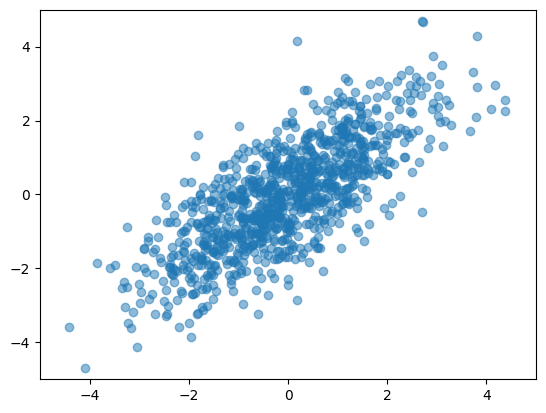

In [5]:
plt.scatter(data2[0,:],data2[1,:], alpha=.5)
plt.xlim(lims)
plt.ylim(lims)

In [6]:
data_cv = np.cov(data2)
data_cv

array([[1.98263953, 1.52927341],
       [1.52927341, 2.08345601]])

In [7]:
U,V = np.linalg.eig(data_cv)
print((U, V))

(array([0.50294381, 3.56315174]), array([[-0.71865998, -0.69536166],
       [ 0.69536166, -0.71865998]]))


In [8]:

 data_rot = V @ data2

(-5.0, 5.0)

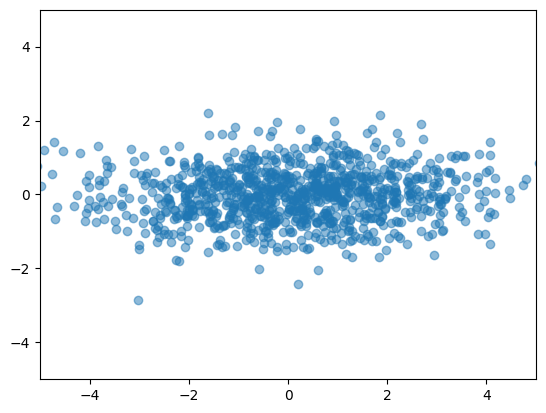

In [9]:

plt.scatter(data_rot[0,:],data_rot[1,:], alpha=.5)
plt.xlim(lims)
plt.ylim(lims)

In [10]:
data_rot[1,] = 0

(-5.0, 5.0)

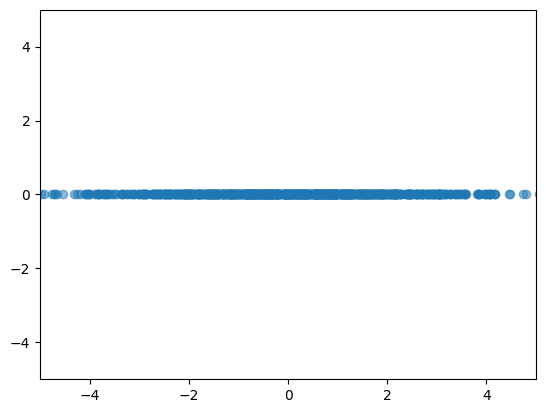

In [11]:

plt.scatter(data_rot[0,:],data_rot[1,:], alpha=.5)
plt.xlim(lims)
plt.ylim(lims)

In [12]:
data2_1d = V.T @ data_rot

(-5.0, 5.0)

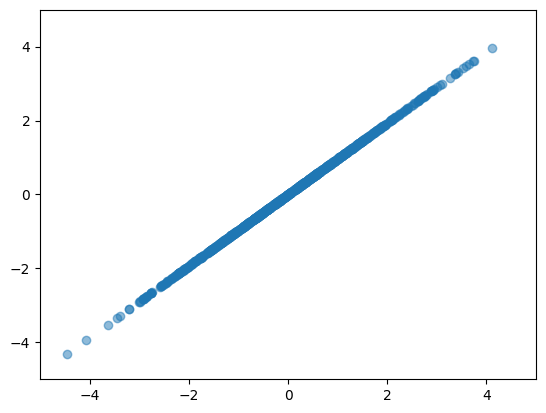

In [13]:
plt.scatter(data2_1d[0,:],data2_1d[1,:], alpha=.5)
plt.xlim(lims)
plt.ylim(lims)

In [14]:
np.random.seed(1)
data2 = np.random.multivariate_normal([0,0], [[2,1.5],[1.5,2]], 1000)
data2.shape

(1000, 2)

In [15]:
np.random.seed(1)
mu_true = np.array([0.0, 0.0])
Sigma_true = np.array([[2.0, 1.5],[1.5, 2.0]])
data2 = np.random.multivariate_normal(mu_true, Sigma_true, 1000).T

mu_hat = np.mean(data2, axis=1)  # estimated mean (2,)
Sigma_hat = np.cov(data2)        # estimated covariance (2x2)

print("True μ:", mu_true)
print("True Σ:\n", Sigma_true)
print("Estimated μ̂:", mu_hat)
print("Estimated Σ̂:\n", Sigma_hat)


True μ: [0. 0.]
True Σ:
 [[2.  1.5]
 [1.5 2. ]]
Estimated μ̂: [-0.06557406 -0.03893797]
Estimated Σ̂:
 [[1.98263953 1.52927341]
 [1.52927341 2.08345601]]


In [16]:
eigvals, V = np.linalg.eig(Sigma_hat)
VT_V = V.T @ V
V_VT = V @ V.T
print("VᵀV:\n", VT_V)
print("VVᵀ:\n", V_VT)



VᵀV:
 [[1. 0.]
 [0. 1.]]
VVᵀ:
 [[1. 0.]
 [0. 1.]]


In [17]:
import numpy as np

# 1. Define a sample square matrix A
A = np.array([[2, 1], 
              [1, 2]])

# 2. Compute eigenvalues (w) and eigenvectors (v) using numpy.linalg.eig()
# w will be a 1D array of eigenvalues
# v will be a 2D array where each column is an eigenvector
w, v = np.linalg.eig(A)

print(f"Matrix A:\n{A}\n")
print(f"Eigenvalues (w): {w}\n")
print(f"Eigenvectors (v):\n{v}\n")

# 3. Verify the property A * v = lambda * v for each eigenvector/eigenvalue pair
for i in range(len(w)):
    # Select the i-th eigenvalue and corresponding eigenvector (column i)
    eigenvalue = w[i]
    eigenvector = v[:, i]
    
    # Calculate the left-hand side (LHS): A * v
    LHS = np.dot(A, eigenvector)
    
    # Calculate the right-hand side (RHS): lambda * v
    RHS = eigenvalue * eigenvector
    
    # Check if LHS and RHS are approximately equal (due to potential floating-point errors)
    is_close = np.allclose(LHS, RHS)
    
    print(f"For eigenvalue {eigenvalue}:")
    print(f"  LHS (A*v): {LHS}")
    print(f"  RHS (λ*v): {RHS}")
    print(f"  LHS == RHS is approximately: {is_close}\n")



Matrix A:
[[2 1]
 [1 2]]

Eigenvalues (w): [3. 1.]

Eigenvectors (v):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

For eigenvalue 3.0:
  LHS (A*v): [2.12132034 2.12132034]
  RHS (λ*v): [2.12132034 2.12132034]
  LHS == RHS is approximately: True

For eigenvalue 1.0:
  LHS (A*v): [-0.70710678  0.70710678]
  RHS (λ*v): [-0.70710678  0.70710678]
  LHS == RHS is approximately: True



Case A (unequal var, +cov) 
Σ̂:
 [[4.03501136 1.56372637]
 [1.56372637 1.05013466]] 
Eigenvalues (desc): [4.70419564 0.38095038] 
PC1 angle (deg): 23.17


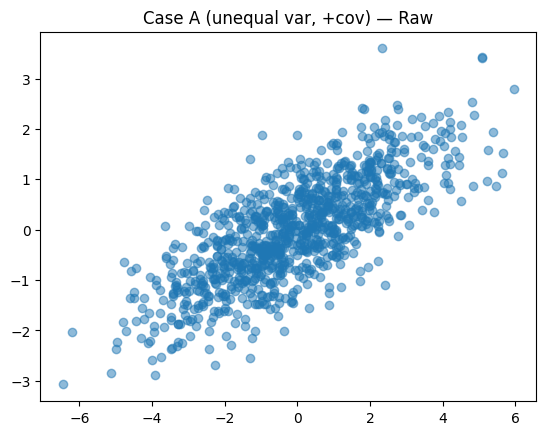

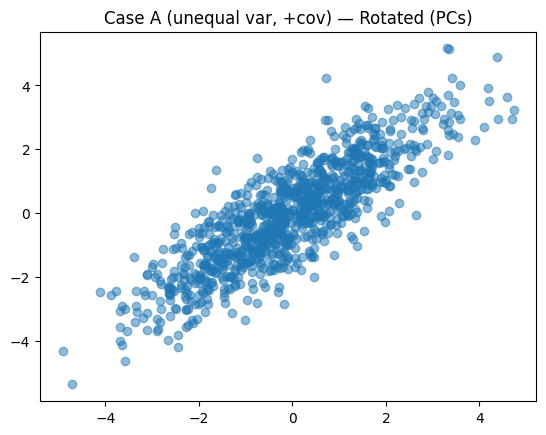

Case B (unequal var, -cov) 
Σ̂:
 [[ 4.10629938 -1.49243835]
 [-1.49243835  0.97884664]] 
Eigenvalues (desc): [4.70419564 0.38095038] 
PC1 angle (deg): -21.83


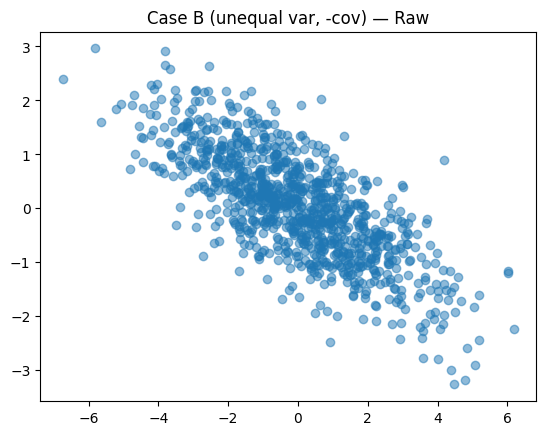

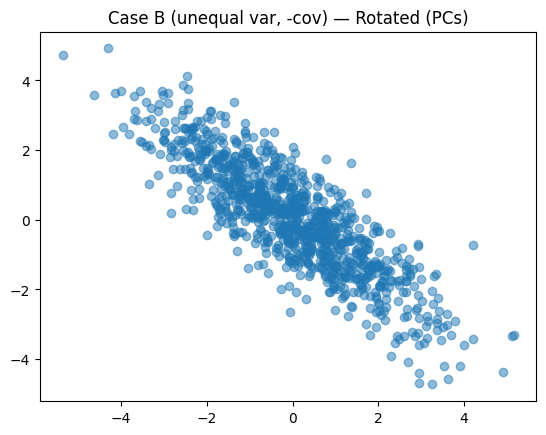

Case C (axis-aligned, 0 cov) 
Σ̂:
 [[ 2.0356121  -0.05388868]
 [-0.05388868  1.00754873]] 
Eigenvalues (desc): [2.0384291  1.00473173] 
PC1 angle (deg): -2.99


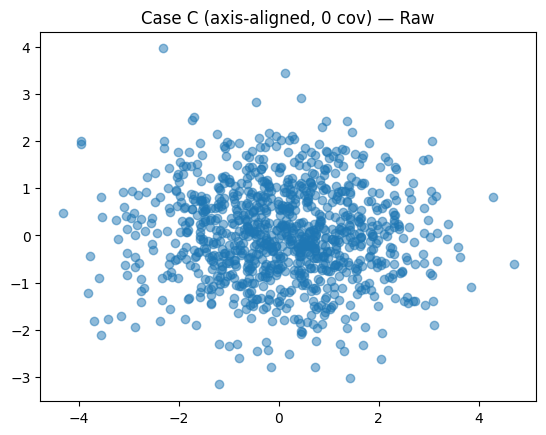

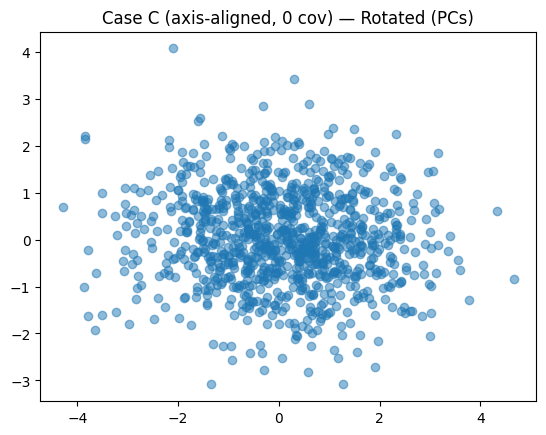

In [22]:

def try_covariance(Sigma, seed=1, n=1000, title=""):
    np.random.seed(seed)
    X = np.random.multivariate_normal([0, 0], Sigma, n).T
    S_hat = np.cov(X)
    evals, E = np.linalg.eig(S_hat)
    order = np.argsort(-evals)      # sort by descending variance
    evals = evals[order]; E = E[:, order]
    angle_deg = np.degrees(np.arctan2(E[1, 0], E[0, 0]))
    print(title, "\nΣ̂:\n", S_hat, "\nEigenvalues (desc):", evals, f"\nPC1 angle (deg): {angle_deg:.2f}")

    plt.scatter(X[0, :], X[1, :], alpha=0.5); plt.title(f"{title} — Raw"); plt.show()
    X_rot = E @ X
    plt.scatter(X_rot[0, :], X_rot[1, :], alpha=0.5); plt.title(f"{title} — Rotated (PCs)"); plt.show()

try_covariance(np.array([[4.0,  1.5],[ 1.5, 1.0]]), title="Case A (unequal var, +cov)")
try_covariance(np.array([[4.0, -1.5],[-1.5, 1.0]]), title="Case B (unequal var, -cov)")
try_covariance(np.array([[2.0,  0.0],[ 0.0, 1.0]]), title="Case C (axis-aligned, 0 cov)")
